# Лабораторная работа №5

### Выполнили: 
* Иванов Александр Константинович, 368220 
* Братушка Никита Игоревич, 367924
* Проворов Николай Дмитриевич, 368690


# Импортирование необходимых библиотек

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot, heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from time import time

# Загрузим датасет для классификации и разделим его в соотношении 80/20 на обучающую и тестовую выборки соответственно:

In [9]:
train = pd.read_csv(open("heart_modified.csv"))

print(train.head()) # Выводим считанные данные

X = train.drop("target", axis=1)
y = train["target"]

X_train, X_tests, y_train, y_tests = train_test_split(X, y, test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Обучающая выборка
X_tests = scaler.fit_transform(X_tests) # Тестовая выборка

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   

    oldpeak  slope  ca  thal  target  
0  1.087338      0   0     1       1  
1  2.122573      0   0     2       1  
2  0.310912      2   0     2       1  
3 -0.206705      2   0     2       1  
4 -0.379244      2   0     2       1  


# Бэггинг решающих деревьев(случайный лес, RandomForest)

С помощью удобного инструмента GridSearchCV выберем лучшие параметры для модели

In [10]:
classifier_rf = RandomForestClassifier(random_state=10)
param_rf = {
    "n_estimators": [20, 50, 100, 200],
    "max_depth" : [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10, 20]
}

grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=param_rf, scoring="accuracy", cv=5)

# Обучение и вычисление времени
time_fit_rf = time()
grid_search_rf.fit(X_train, y_train)
time_fit_rf = time() - time_fit_rf

# Предсказания модели на основе лучших параметров из grid_search_rf.best_estimator_ (уже обучена)
y_predict_rf = grid_search_rf.best_estimator_.predict(X_tests) 


In [12]:
# Параметры
print("Лучшие параметры:\n")
print("Количество деревьев(n_estimators): ", grid_search_rf.best_params_.get("n_estimators"))
print("Максимальная глубина деревьев (max_depth): ", grid_search_rf.best_params_.get("max_depth"))
print("Количество образцов в узле (min_samples_split): ", grid_search_rf.best_params_.get("min_samples_split"), "\n")

# Оценка
print("Отчет о классификации:\n", classification_report(y_true=y_tests, y_pred=y_predict_rf))
print("Точность(accuracy): ", accuracy_score(y_true=y_tests, y_pred=y_predict_rf))
print("F1 (f1_score): ", f1_score(y_true=y_tests, y_pred=y_predict_rf))

precision_rf = classification_report(y_true=y_tests, y_pred=y_predict_rf, output_dict=True)["weighted avg"]["precision"]

Лучшие параметры:

Количество деревьев(n_estimators):  50
Максимальная глубина деревьев (max_depth):  5
Количество образцов в узле (min_samples_split):  10 

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

Точность(accuracy):  0.8852459016393442
F1 (f1_score):  0.8923076923076924


# Градиентный бустинг над решающими деревьями (GradientBoostingRegressor)

In [13]:
classifier_gb = GradientBoostingClassifier(random_state=10)
param_gb = {
    "n_estimators": [20, 50, 100, 200],
    "max_depth" : [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10, 20]
}

grid_search_gb = GridSearchCV(estimator=classifier_gb, param_grid=param_gb, scoring="accuracy", cv=5)

# Обучение и вычисление времени
time_fit_gb = time()
grid_search_gb.fit(X_train, y_train)
time_fit_gb = time() - time_fit_gb

# Предсказания модели на основе лучших параметров из grid_search_gb.best_estimator_ (уже обучена)
y_predict_gb = grid_search_gb.best_estimator_.predict(X_tests) 

In [14]:
# Параметры
print("Лучшие параметры:\n")
print("Количество деревьев(n_estimators): ", grid_search_gb.best_params_.get("n_estimators"))
print("Максимальная глубина деревьев (max_depth): ", grid_search_gb.best_params_.get("max_depth"))
print("Количество образцов в узле (min_samples_split): ", grid_search_gb.best_params_.get("min_samples_split"), "\n")

# Оценка
print("Отчет о классификации:\n", classification_report(y_true=y_tests, y_pred=y_predict_gb))
print("Точность(accuracy): ", accuracy_score(y_true=y_tests, y_pred=y_predict_gb))
print("F1 (f1_score): ", f1_score(y_true=y_tests, y_pred=y_predict_gb))

precision_gb = classification_report(y_true=y_tests, y_pred=y_predict_gb, output_dict=True)["weighted avg"]["precision"]

Лучшие параметры:

Количество деревьев(n_estimators):  100
Максимальная глубина деревьев (max_depth):  5
Количество образцов в узле (min_samples_split):  20 

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Точность(accuracy):  0.8360655737704918
F1 (f1_score):  0.8529411764705882


# Сравнительная оценка

### Критерии оценивания

* Время обучения

* Точность, F1-мера и полнота

* Матрица ошибок

Время обучения RandomForest 14.98212 cекунд
Время обучения GradientBoosting 26.33794 cекунд 

Точность RandomForest: 0.88525
F1 RandomForest: 0.89231
Полнота RandomForest: 0.88597

Точность GradientBoosting: 0.83607
F1 GradientBoosting: 0.85294
Полнота GradientBoosting: 0.83664



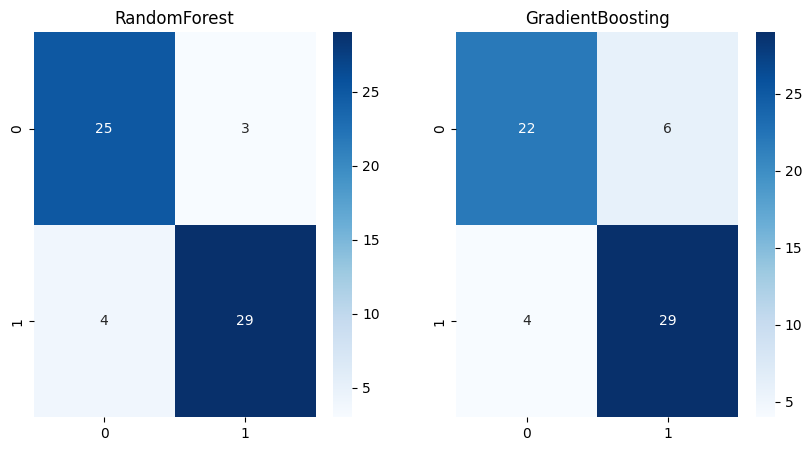

In [25]:
# Время обучения
print("Время обучения RandomForest {:.5f} cекунд".format(time_fit_rf))
print("Время обучения GradientBoosting {:.5f} cекунд \n".format(time_fit_gb))

# Точность, F1-мера и полнота
print("Точность RandomForest: {:.5f}".format(accuracy_score(y_true=y_tests, y_pred=y_predict_rf)))
print("F1 RandomForest: {:.5f}".format(f1_score(y_true=y_tests, y_pred=y_predict_rf)))
print("Полнота RandomForest: {:.5f}\n".format(precision_rf))

print("Точность GradientBoosting: {:.5f}".format(accuracy_score(y_true=y_tests, y_pred=y_predict_gb)))
print("F1 GradientBoosting: {:.5f}".format(f1_score(y_true=y_tests, y_pred=y_predict_gb)))
print("Полнота GradientBoosting: {:.5f}\n".format(precision_gb))

# Матрица ошибок
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_true=y_tests, y_pred=y_predict_rf), annot=True, fmt="d", cmap="Blues")
plt.title("RandomForest")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_true=y_tests, y_pred=y_predict_gb), annot=True, fmt="d", cmap="Blues")
plt.title("GradientBoosting")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")

plt.show()
